# EU Digital Elevation Model v1.1

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the EUDEM v1.1 product.

EU-DEM is a digital surface model (DSM) of EEA member and cooperating countries representing the first surface as illuminated by the sensors. It is a hybrid product based on SRTM and ASTER GDEM data fused by a weighted averaging approach.

The EU-DEM v1.1 is a resulting dataset of the EU-DEM v1.0 upgrade which enhances the correction of geo-positioning issues, reducing the number of artefacts, improving the vertical accuracy of EU-DEM using ICESat as reference and ensuring consistency with EU-Hydro public beta.

Relevant links:
* https://www.eea.europa.eu/data-and-maps/data/copernicus-land-monitoring-service-eu-dem#tab-metadata
* https://land.copernicus.eu/imagery-in-situ/eu-dem/eu-dem-v1.1?tab=metadata

The product in the ACube is named `COPERNICUS_EUDEM_V11`

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has a single measurement called `band_1`, that the spatial resolution is 25m. We can also see there is only one dataset.

In [1]:
import datacube
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_eudem')
product = 'COPERNICUS_EUDEM_V11'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,format,instrument,product_type,platform,crs,resolution,spatial_dimensions
id,,,,,,,,,
24,COPERNICUS_EUDEM_V11,EU-DEM v1.0 is a digital surface model (DSM) o...,GeoTIFF,"SRTM,GDEM",DEM,"SRTM,GDEM",EPSG:3035,"[-25, 25]","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

,,aliases,dtype,name,nodata,units
product,measurement,,,,,
COPERNICUS_EUDEM_V11,band_1,"[band_01, Band1, Band_1]",float32,band_1,0,1


In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    pprint(dataset.metadata_doc)

{'conditions_applying_to_access_and_use': 'Access to data is based on a '
                                          'principle of full, open and free '
                                          'access as established by the '
                                          'Copernicus data and information '
                                          'policy Regulation (EU) No 1159/2013 '
                                          'of 12 July 2013. This regulation '
                                          'establishes registration and '
                                          'licensing conditions for '
                                          'GMES/Copernicus users and can be '
                                          'found at '
                                          'https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32013R1159. '
                                          'Free, full and open access to this '
                                          'data set is made on th

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-25,25),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 611, y: 901)
Coordinates:
  * time     (time) datetime64[ns] 2005-12-31T11:59:59.500000
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x        (x) float64 5.963e+05 5.963e+05 5.964e+05 ... 6.115e+05 6.116e+05
Data variables:
    band_1   (time, y, x) float32 179.4131 179.83186 ... 156.62157 157.90457
Attributes:
    crs:      EPSG:32633

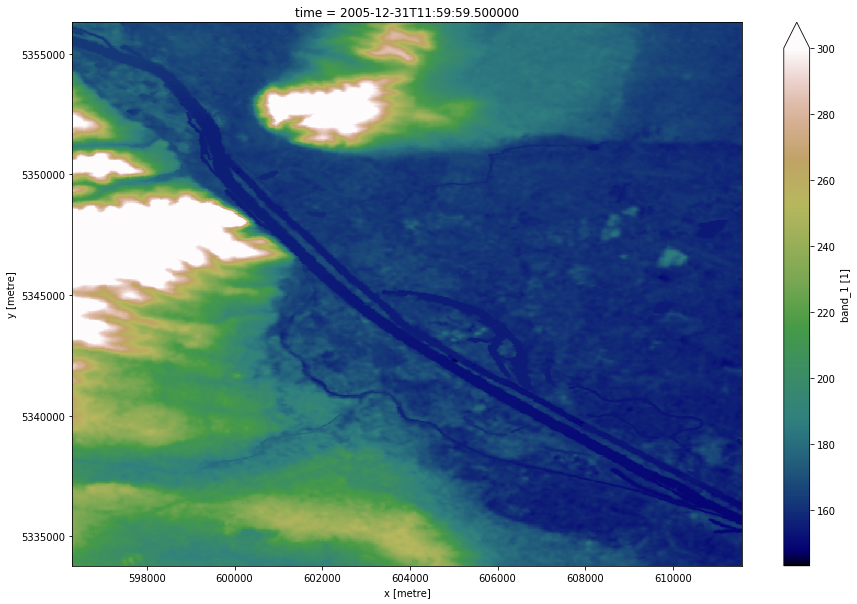

In [7]:
data.band_1.plot(size=10, cmap='gist_earth', vmax=300)